# Test LayerNorm Functionality

In [11]:
import torch
import torch.nn as nn

In [12]:
# B x T x d_model
ip = torch.randn(3, 50, 64)

In [13]:
ln1 = nn.LayerNorm(64)

In [151]:
torch.manual_seed(0)
d = torch.float32
w, b = torch.randn(64, dtype = d), torch.randn(64, dtype = d)
ln1.weight.data, ln1.bias.data = w, b

In [152]:
ln1.weight, ln1.bias

(Parameter containing:
 tensor([-1.1258, -1.1524, -0.2506, -0.4339,  0.8487,  0.6920, -0.3160, -2.1152,
          0.3223, -1.2633,  0.3500,  0.3081,  0.1198,  1.2377,  1.1168, -0.2473,
         -1.3527, -1.6959,  0.5667,  0.7935,  0.5988, -1.5551, -0.3414,  1.8530,
          0.7502, -0.5855, -0.1734,  0.1835,  1.3894,  1.5863,  0.9463, -0.8437,
         -0.6136,  0.0316, -0.4927,  0.2484,  0.4397,  0.1124,  0.6408,  0.4412,
         -0.1023,  0.7924, -0.2897,  0.0525,  0.5229,  2.3022, -1.4689, -1.5867,
         -0.6731,  0.8728,  1.0554,  0.1778, -0.2303, -0.3918,  0.5433, -0.3952,
         -0.4462,  0.7440,  1.5210,  3.4105, -1.5312, -1.2341,  1.8197, -0.5515],
        requires_grad=True),
 Parameter containing:
 tensor([-5.6925e-01,  9.1997e-01,  1.1108e+00,  1.2899e+00, -1.4782e+00,
          2.5672e+00, -4.7312e-01,  3.3555e-01, -1.6293e+00, -5.4974e-01,
         -4.7983e-01, -4.9968e-01, -1.0670e+00,  1.1149e+00, -1.4067e-01,
          8.0575e-01, -9.3348e-02,  6.8705e-01, -8.383

In [153]:
torch.manual_seed(4)
s = torch.randn(5,2)
F.softmax(s, dim = -1).numpy().tolist()

[[0.13731618225574493, 0.8626838326454163],
 [0.8010032176971436, 0.19899679720401764],
 [0.8323248624801636, 0.16767510771751404],
 [0.08867259323596954, 0.9113273620605469],
 [0.5416122078895569, 0.4583878219127655]]

In [154]:
torch.manual_seed(4)
s = torch.randn(5,2, dtype = torch.float64)
(torch.exp(s)/ torch.exp(s).sum(dim = -1, keepdim = True)).numpy().tolist()

[[0.13731619184990682, 0.8626838081500933],
 [0.8010032074322196, 0.19899679256778033],
 [0.8323248850289641, 0.16767511497103596],
 [0.08867259182925576, 0.9113274081707442],
 [0.5416121834400871, 0.45838781655991284]]

In [155]:
torch.tensor(3.4) + 1e-5

tensor(3.4000)

In [156]:
# Standard layernorm forward pass
out = ln1(ip.to(d))
out.shape

torch.Size([3, 50, 64])

In [157]:
normed_ip = (ip - ip.mean(dim = -1, keepdim = True)) / ip.std(dim = -1, keepdim = True)

eps = 1e-5
normed_ip_2 = (ip - ip.mean(dim = -1, keepdim = True)) / (ip.var(dim = -1, keepdim = True) + eps).sqrt()

In [171]:
import torch

class CustomLayerNorm(torch.nn.Module):
    def __init__(self, features, eps=1e-6):
        super(CustomLayerNorm, self).__init__()
        self.gamma = torch.nn.Parameter(w)
        self.beta = torch.nn.Parameter(b)
        self.eps = eps

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True)
        return self.gamma * (x - mean) / (var + self.eps) ** 0.5 + self.beta

ln2 = CustomLayerNorm(64)

In [179]:
ln2(ip)

tensor([[[ 0.5803,  1.4255,  1.3420,  ...,  2.5967, -1.6328,  2.1666],
         [ 0.2506,  0.2957,  1.0119,  ...,  1.0536,  4.8044,  1.1802],
         [-0.6232,  1.8854,  1.2316,  ...,  1.0968,  0.2085,  1.4994],
         ...,
         [ 0.0110, -0.5832,  1.0276,  ...,  1.9026,  0.6276,  1.2514],
         [ 0.2519,  0.7841,  0.8895,  ...,  0.9008,  3.5685,  0.5880],
         [ 2.0511, -0.7168,  1.0149,  ...,  0.1818, -2.4453,  1.3931]],

        [[-0.8594,  0.3538,  1.3597,  ...,  2.5607,  5.3209,  0.7927],
         [-0.0672, -0.2639,  0.7863,  ...,  2.4977, -1.4951,  1.9522],
         [-0.6731,  0.6834,  1.2015,  ...,  2.2722,  0.0642,  1.9596],
         ...,
         [ 0.4634,  1.5371,  1.8780,  ...,  1.9855,  2.0831,  1.6306],
         [-1.9956,  0.7095,  1.3351,  ...,  1.2205, -3.1460,  1.2350],
         [ 0.9594,  1.9313,  1.1444,  ...,  3.0251, -0.3294,  1.6457]],

        [[ 0.5291,  0.6989,  1.4557,  ...,  2.5170,  0.3833,  1.4600],
         [-0.6501,  2.8963,  0.7868,  ...,  1

In [180]:
ln1(ip)

tensor([[[ 0.5894,  1.4294,  1.3438,  ...,  2.6080, -1.6530,  2.1727],
         [ 0.2571,  0.2907,  1.0111,  ...,  1.0527,  4.8350,  1.1785],
         [-0.6236,  1.8930,  1.2326,  ...,  1.0962,  0.2029,  1.5003],
         ...,
         [ 0.0156, -0.5950,  1.0270,  ...,  1.9085,  0.6253,  1.2503],
         [ 0.2584,  0.7831,  0.8877,  ...,  0.8987,  3.5894,  0.5817],
         [ 2.0718, -0.7298,  1.0142,  ...,  0.1740, -2.4719,  1.3931]],

        [[-0.8617,  0.3493,  1.3617,  ...,  2.5717,  5.3556,  0.7880],
         [-0.0633, -0.2733,  0.7837,  ...,  2.5082, -1.5142,  1.9567],
         [-0.6739,  0.6815,  1.2023,  ...,  2.2809,  0.0575,  1.9642],
         ...,
         [ 0.4716,  1.5420,  1.8840,  ...,  1.9920,  2.0923,  1.6326],
         [-2.0069,  0.7078,  1.3369,  ...,  1.2210, -3.1782,  1.2338],
         [ 0.9715,  1.9393,  1.1447,  ...,  3.0398, -0.3393,  1.6477]],

        [[ 0.5378,  0.6972,  1.4585,  ...,  2.5277,  0.3790,  1.4605],
         [-0.6508,  2.9119,  0.7842,  ...,  1

In [63]:
ln1.weight.dtype

torch.float32

In [83]:
import torch
import torch.nn as nn

class CustomLayerNorm2(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5, elementwise_affine=True):
        super(CustomLayerNorm2, self).__init__()
        self.normalized_shape = normalized_shape
        self.eps = eps
        self.elementwise_affine = elementwise_affine
        if self.elementwise_affine:
            self.weight = nn.Parameter(torch.Tensor(*normalized_shape))
            self.bias = nn.Parameter(torch.Tensor(*normalized_shape))
        else:
            self.register_parameter('weight', None)
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        if self.elementwise_affine:
            nn.init.ones_(self.weight)
            nn.init.zeros_(self.bias)

    def forward(self, input):
        if input.dim() <= 2:
            # Apply layer norm on the last dimension
            return F.layer_norm(input, self.normalized_shape, weight=self.weight, bias=self.bias, eps=self.eps)
        else:
            # Reshape input to (B, F, ...) where B is batch size and F is the product of remaining dimensions
            shape = input.size()
            _, f = shape[:-1], shape[-1]
            input_reshape = input.contiguous().view(-1, f)
            # Apply layer norm
            output_reshape = F.layer_norm(input_reshape, self.normalized_shape[-1:], weight=self.weight, bias=self.bias, eps=self.eps)
            # Reshape output back to the original shape
            output = output_reshape.view(*shape)
            return output


In [84]:
import torch.nn.functional as F
ln3 = CustomLayerNorm2((64,))
ln3.weight.data, ln3.bias.data = w, b

In [85]:
ip.shape

torch.Size([3, 50, 64])

(array([6.000e+00, 2.800e+01, 2.160e+02, 1.317e+03, 6.900e+03, 9.250e+02,
        1.720e+02, 2.700e+01, 5.000e+00, 4.000e+00]),
 array([-0.05425167, -0.04198093, -0.0297102 , -0.01743946, -0.00516872,
         0.00710201,  0.01937275,  0.03164349,  0.04391422,  0.05618496,
         0.0684557 ]),
 <BarContainer object of 10 artists>)

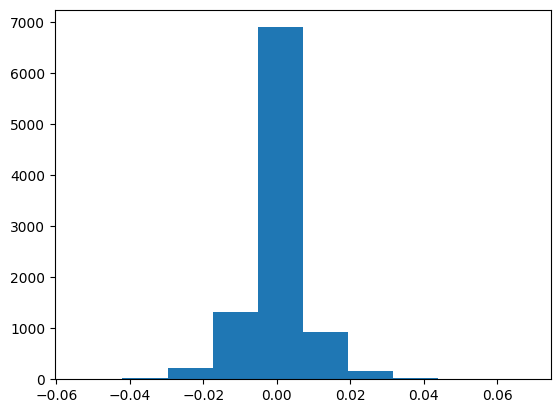

In [99]:
plt.hist((ln1(ip) - (normed_ip_2  * w + b)).flatten().detach())

In [87]:
ln1(ip)

tensor([[[ 0.5894,  1.4294,  1.3438,  ...,  2.6080, -1.6530,  2.1727],
         [ 0.2571,  0.2907,  1.0111,  ...,  1.0527,  4.8350,  1.1785],
         [-0.6236,  1.8930,  1.2326,  ...,  1.0962,  0.2029,  1.5003],
         ...,
         [ 0.0156, -0.5950,  1.0270,  ...,  1.9085,  0.6253,  1.2503],
         [ 0.2584,  0.7831,  0.8877,  ...,  0.8987,  3.5894,  0.5817],
         [ 2.0718, -0.7298,  1.0142,  ...,  0.1740, -2.4719,  1.3931]],

        [[-0.8617,  0.3493,  1.3617,  ...,  2.5717,  5.3556,  0.7880],
         [-0.0633, -0.2733,  0.7837,  ...,  2.5082, -1.5142,  1.9567],
         [-0.6739,  0.6815,  1.2023,  ...,  2.2809,  0.0575,  1.9642],
         ...,
         [ 0.4716,  1.5420,  1.8840,  ...,  1.9920,  2.0923,  1.6326],
         [-2.0069,  0.7078,  1.3369,  ...,  1.2210, -3.1782,  1.2338],
         [ 0.9715,  1.9393,  1.1447,  ...,  3.0398, -0.3393,  1.6477]],

        [[ 0.5378,  0.6972,  1.4585,  ...,  2.5277,  0.3790,  1.4605],
         [-0.6508,  2.9119,  0.7842,  ...,  1

In [49]:
normed_ip * w + b

tensor([[[ 0.5803,  1.4255,  1.3420,  ...,  2.5967, -1.6328,  2.1666],
         [ 0.2506,  0.2957,  1.0119,  ...,  1.0536,  4.8044,  1.1802],
         [-0.6232,  1.8854,  1.2316,  ...,  1.0968,  0.2085,  1.4994],
         ...,
         [ 0.0110, -0.5832,  1.0276,  ...,  1.9026,  0.6276,  1.2514],
         [ 0.2519,  0.7841,  0.8895,  ...,  0.9008,  3.5685,  0.5880],
         [ 2.0511, -0.7168,  1.0149,  ...,  0.1818, -2.4453,  1.3931]],

        [[-0.8594,  0.3538,  1.3597,  ...,  2.5607,  5.3209,  0.7927],
         [-0.0672, -0.2639,  0.7863,  ...,  2.4977, -1.4951,  1.9522],
         [-0.6731,  0.6834,  1.2015,  ...,  2.2722,  0.0642,  1.9596],
         ...,
         [ 0.4634,  1.5371,  1.8780,  ...,  1.9855,  2.0831,  1.6306],
         [-1.9956,  0.7095,  1.3351,  ...,  1.2205, -3.1460,  1.2350],
         [ 0.9594,  1.9313,  1.1444,  ...,  3.0251, -0.3294,  1.6457]],

        [[ 0.5291,  0.6989,  1.4557,  ...,  2.5170,  0.3833,  1.4600],
         [-0.6501,  2.8963,  0.7868,  ...,  1

In [50]:
normed_ip_2  * w + b

tensor([[[ 0.5803,  1.4255,  1.3420,  ...,  2.5967, -1.6328,  2.1666],
         [ 0.2506,  0.2957,  1.0119,  ...,  1.0536,  4.8044,  1.1802],
         [-0.6232,  1.8854,  1.2316,  ...,  1.0968,  0.2085,  1.4994],
         ...,
         [ 0.0110, -0.5831,  1.0276,  ...,  1.9026,  0.6276,  1.2514],
         [ 0.2519,  0.7841,  0.8895,  ...,  0.9008,  3.5685,  0.5880],
         [ 2.0511, -0.7168,  1.0149,  ...,  0.1818, -2.4453,  1.3931]],

        [[-0.8594,  0.3538,  1.3597,  ...,  2.5607,  5.3208,  0.7927],
         [-0.0672, -0.2639,  0.7863,  ...,  2.4977, -1.4951,  1.9522],
         [-0.6731,  0.6834,  1.2015,  ...,  2.2722,  0.0642,  1.9596],
         ...,
         [ 0.4634,  1.5371,  1.8780,  ...,  1.9855,  2.0831,  1.6306],
         [-1.9956,  0.7095,  1.3351,  ...,  1.2205, -3.1460,  1.2350],
         [ 0.9594,  1.9313,  1.1444,  ...,  3.0251, -0.3294,  1.6457]],

        [[ 0.5291,  0.6989,  1.4557,  ...,  2.5170,  0.3833,  1.4600],
         [-0.6501,  2.8963,  0.7868,  ...,  1

In [51]:
out

tensor([[[ 0.5894,  1.4294,  1.3438,  ...,  2.6080, -1.6530,  2.1727],
         [ 0.2571,  0.2907,  1.0111,  ...,  1.0527,  4.8350,  1.1785],
         [-0.6236,  1.8930,  1.2326,  ...,  1.0962,  0.2029,  1.5003],
         ...,
         [ 0.0156, -0.5950,  1.0270,  ...,  1.9085,  0.6253,  1.2503],
         [ 0.2584,  0.7831,  0.8877,  ...,  0.8987,  3.5894,  0.5817],
         [ 2.0718, -0.7298,  1.0142,  ...,  0.1740, -2.4719,  1.3931]],

        [[-0.8617,  0.3493,  1.3617,  ...,  2.5717,  5.3556,  0.7880],
         [-0.0633, -0.2733,  0.7837,  ...,  2.5082, -1.5142,  1.9567],
         [-0.6739,  0.6815,  1.2023,  ...,  2.2809,  0.0575,  1.9642],
         ...,
         [ 0.4716,  1.5420,  1.8840,  ...,  1.9920,  2.0923,  1.6326],
         [-2.0069,  0.7078,  1.3369,  ...,  1.2210, -3.1782,  1.2338],
         [ 0.9715,  1.9393,  1.1447,  ...,  3.0398, -0.3393,  1.6477]],

        [[ 0.5378,  0.6972,  1.4585,  ...,  2.5277,  0.3790,  1.4605],
         [-0.6508,  2.9119,  0.7842,  ...,  1

In [26]:
torch.allclose(out, normed_ip_2  * w + b)

False

In [27]:
torch.allclose(normed_ip * w + b, normed_ip_2  * w + b)

False

In [37]:
# l.bias.data

torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])
torch.Size([1000])


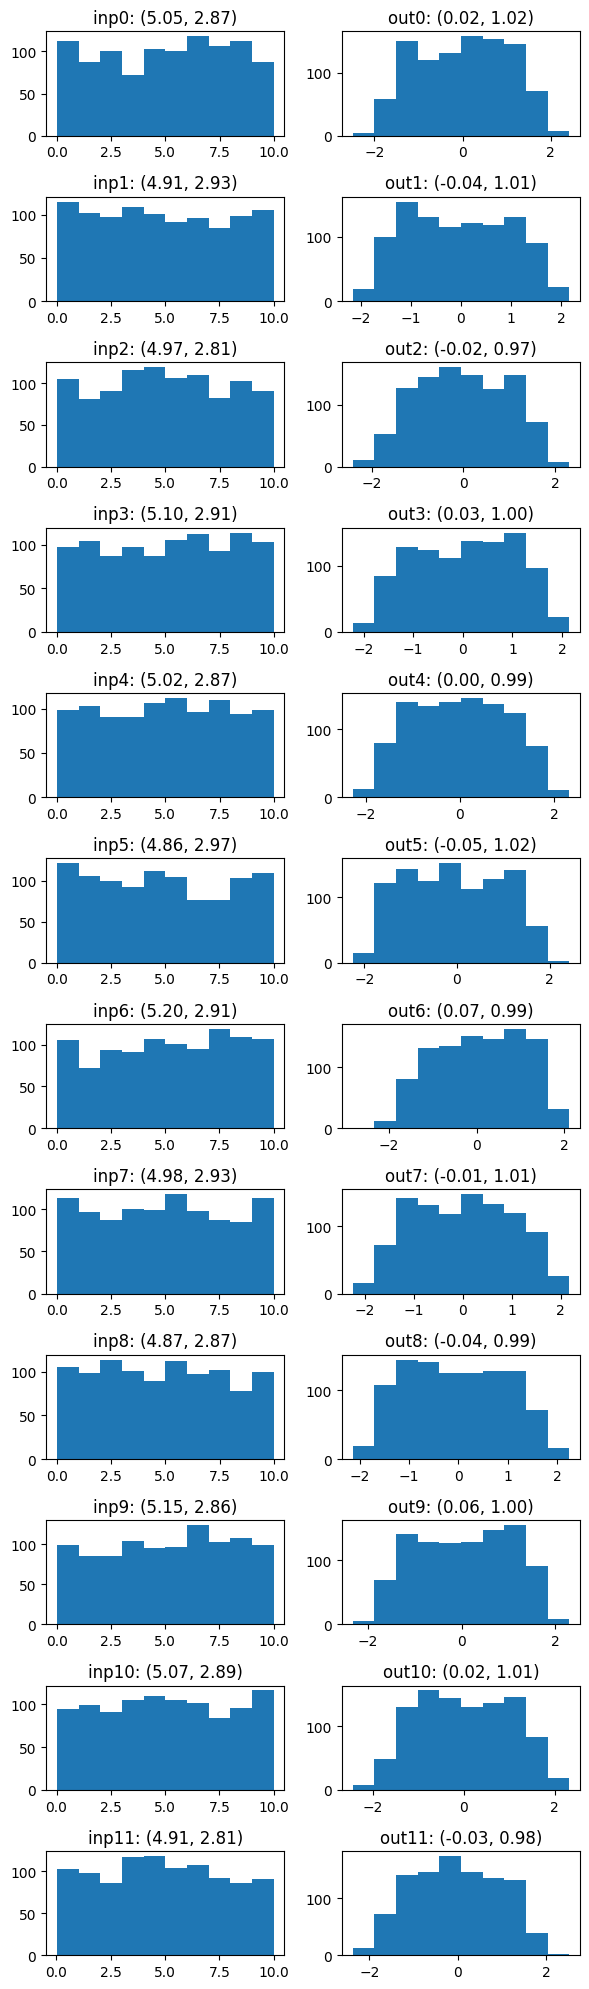

In [42]:
import numpy as np
import matplotlib.pyplot as plt
dmodel = 20
inp = np.random.uniform(0, 10.0, (5, 1000, dmodel))
inp = torch.from_numpy(inp).float()
l = nn.LayerNorm(dmodel)
with torch.no_grad():
    out = l(inp[:]) 
f, axes = plt.subplots(12, 2, figsize=(6, 20))
feat = 0
datapoint = 0
for i in range(12):
    print(inp[datapoint,:, i].shape)
    axes[i][0].hist(inp[datapoint, :, i])
    axes[i][0].set_title(f"inp{i}: ({inp[0, :, i].mean():0.2f}, {inp[0, :, i].std():0.2f})")
    axes[i][1].hist(out[datapoint, :, i])
    axes[i][1].set_title(f"out{i}: ({out[0, :, i].mean():0.2f}, {out[0, :, i].std():0.2f})")
    
f.tight_layout()

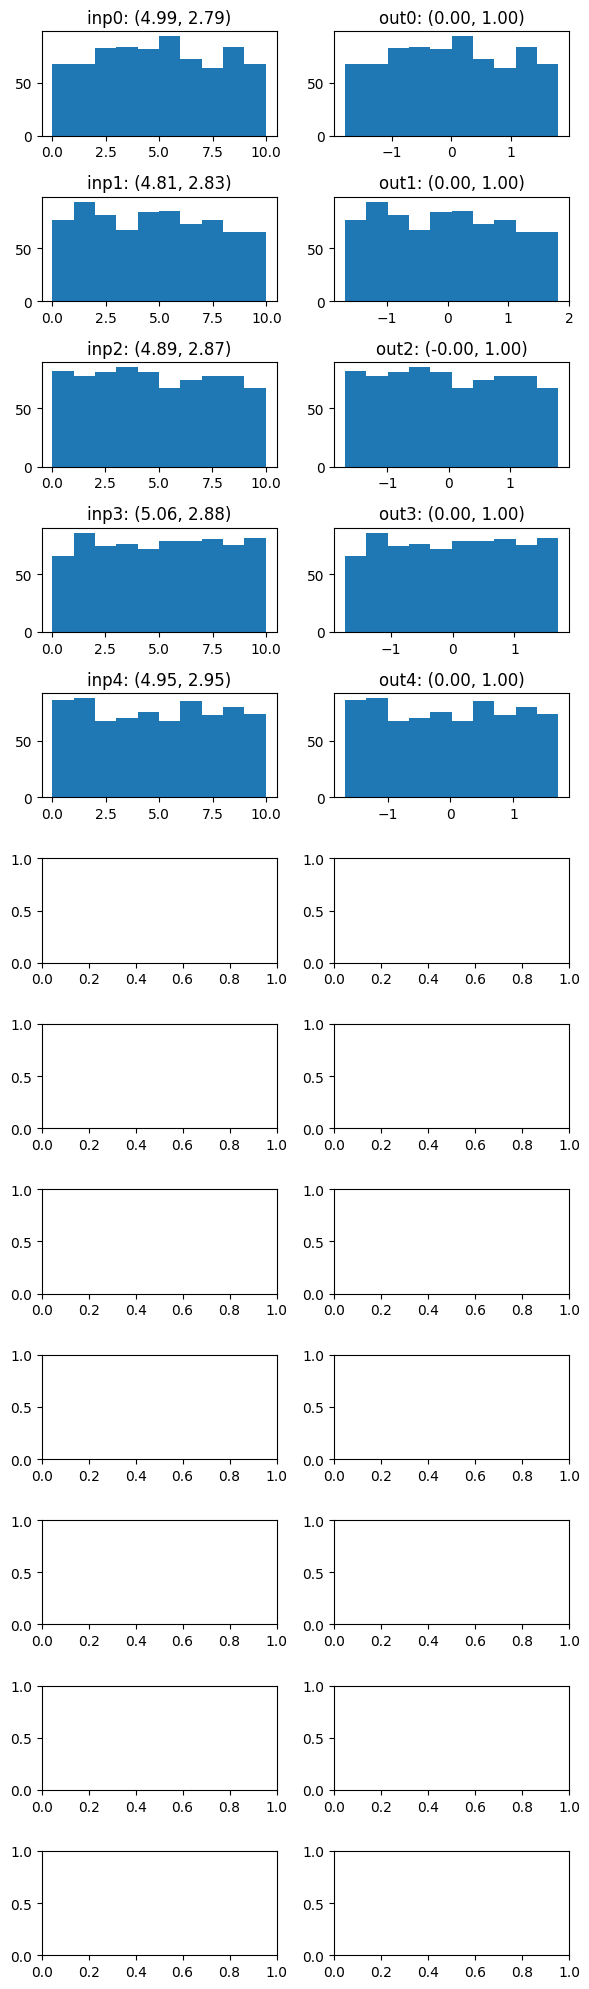

In [34]:
import numpy as np
import matplotlib.pyplot as plt
dmodel = 768
inp = np.random.uniform(0, 10.0, (5, 1000, dmodel))
inp = torch.from_numpy(inp).float()
l = nn.LayerNorm(dmodel)
with torch.no_grad():
    out = l(inp[:]) 
f, axes = plt.subplots(12, 2, figsize=(6, 20))
feat = 0
datapoint = 0
for i in range(5):
    axes[i][0].hist(inp[datapoint, i, :])
    axes[i][0].set_title(f"inp{i}: ({inp[0, i, :].mean():0.2f}, {inp[0, i, :].std():0.2f})")
    axes[i][1].hist(out[datapoint, i, :])
    axes[i][1].set_title(f"out{i}: ({out[0, i, :].mean():0.2f}, {out[0, i, :].std():0.2f})")
    
f.tight_layout()